In [1]:
import pandas as pd

Proszę utworzyć dataframe   z https://covid19.who.int/WHO-COVID-19-global-data.csv  a następnie złączyć je z danymi z pliku https://pkgstore.datahub.io/JohnSnowLabs/country-and-continent-codes-list/country-and-continent-codes-list-csv_csv/data/b7876b7f496677669644f3d1069d3121/country-and-continent-codes-list-csv_csv.csv w celu uzyskania informacji o kontynencie na którym leży kraj. Tu mała podpucha jest, uwaga :)

    Pogrupować dane według dnia i kontynentu, aby znaleźć sumaryczną liczbę zachorowań i zgonów (wizualizacja w załączniku covid1.png); zaprezentować te dane w postaci wykresu liniowego.
    Obliczyć średnią  14-dniową zachorowań dla Polski oraz Niemiec (wizualizacja w załączniku covid2.png) i zaprezentować w formie wykresu

In [7]:
url_covid = "https://covid19.who.int/WHO-COVID-19-global-data.csv"
url_continents = "https://pkgstore.datahub.io/JohnSnowLabs/country-and-continent-codes-list/country-and-continent-codes-list-csv_csv/data/b7876b7f496677669644f3d1069d3121/country-and-continent-codes-list-csv_csv.csv"


In [8]:
df_covid = pd.read_csv(url_covid)
df_covid

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-03,AF,Afghanistan,EMRO,0,0,0,0
1,2020-01-04,AF,Afghanistan,EMRO,0,0,0,0
2,2020-01-05,AF,Afghanistan,EMRO,0,0,0,0
3,2020-01-06,AF,Afghanistan,EMRO,0,0,0,0
4,2020-01-07,AF,Afghanistan,EMRO,0,0,0,0
...,...,...,...,...,...,...,...,...
199312,2022-04-18,ZW,Zimbabwe,AFRO,17,247278,1,5463
199313,2022-04-19,ZW,Zimbabwe,AFRO,19,247297,1,5464
199314,2022-04-20,ZW,Zimbabwe,AFRO,39,247336,2,5466
199315,2022-04-21,ZW,Zimbabwe,AFRO,47,247383,1,5467


In [9]:
df_covid.describe()

,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
count,1.993170e+05,1.993170e+05,199317.000000,199317.000000
mean,2.537756e+03,6.091807e+05,31.175846,11623.327182
std,1.671308e+04,3.263640e+06,164.394776,54190.123693
min,-3.295200e+04,0.000000e+00,-2452.000000,0.000000
25%,0.000000e+00,1.870000e+02,0.000000,2.000000
50%,2.500000e+01,1.120200e+04,0.000000,146.000000
75%,5.130000e+02,1.606400e+05,6.000000,2688.000000
max,1.252717e+06,8.000666e+07,11447.000000,982322.000000


In [10]:
# usuwanie wartosci <0
df_covid.query(" New_cases>=0 and New_deaths>=0 ")

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-03,AF,Afghanistan,EMRO,0,0,0,0
1,2020-01-04,AF,Afghanistan,EMRO,0,0,0,0
2,2020-01-05,AF,Afghanistan,EMRO,0,0,0,0
3,2020-01-06,AF,Afghanistan,EMRO,0,0,0,0
4,2020-01-07,AF,Afghanistan,EMRO,0,0,0,0
...,...,...,...,...,...,...,...,...
199312,2022-04-18,ZW,Zimbabwe,AFRO,17,247278,1,5463
199313,2022-04-19,ZW,Zimbabwe,AFRO,19,247297,1,5464
199314,2022-04-20,ZW,Zimbabwe,AFRO,39,247336,2,5466
199315,2022-04-21,ZW,Zimbabwe,AFRO,47,247383,1,5467


In [11]:
df_continents = pd.read_csv(url_continents)
df_continents

,Continent_Name,Continent_Code,Country_Name,Two_Letter_Country_Code,Three_Letter_Country_Code,Country_Number
0,Asia,AS,"Afghanistan, Islamic Republic of",AF,AFG,4.0
1,Europe,EU,"Albania, Republic of",AL,ALB,8.0
2,Antarctica,AN,Antarctica (the territory South of 60 deg S),AQ,ATA,10.0
3,Africa,AF,"Algeria, People's Democratic Republic of",DZ,DZA,12.0
4,Oceania,OC,American Samoa,AS,ASM,16.0
...,...,...,...,...,...,...
257,Africa,AF,"Zambia, Republic of",ZM,ZMB,894.0
258,Oceania,OC,Disputed Territory,XX,NaN,NaN
259,Asia,AS,Iraq-Saudi Arabia Neutral Zone,XE,NaN,NaN
260,Asia,AS,United Nations Neutral Zone,XD,NaN,NaN


In [12]:
len(df_continents), len(df_continents.Two_Letter_Country_Code.unique())

(262, 254)

In [15]:
df_continents[ df_continents.duplicated(subset="Two_Letter_Country_Code") ].sort_values('Two_Letter_Country_Code')

,Continent_Name,Continent_Code,Country_Name,Two_Letter_Country_Code,Three_Letter_Country_Code,Country_Number
17,Asia,AS,"Armenia, Republic of",AM,ARM,51.0
9,Asia,AS,"Azerbaijan, Republic of",AZ,AZE,31.0
59,Asia,AS,"Cyprus, Republic of",CY,CYP,196.0
84,Asia,AS,Georgia,GE,GEO,268.0
117,Asia,AS,"Kazakhstan, Republic of",KZ,KAZ,398.0
192,Asia,AS,Russian Federation,RU,RUS,643.0
235,Asia,AS,"Turkey, Republic of",TR,TUR,792.0
172,North America,NaN,United States Minor Outlying Islands,UM,UMI,581.0


In [16]:
df_continents.query("Two_Letter_Country_Code=='RU'")

,Continent_Name,Continent_Code,Country_Name,Two_Letter_Country_Code,Three_Letter_Country_Code,Country_Number
191,Europe,EU,Russian Federation,RU,RUS,643.0
192,Asia,AS,Russian Federation,RU,RUS,643.0


In [17]:
# usuwanie duplikatow z df_continents
df_continents.drop_duplicates(subset="Two_Letter_Country_Code", inplace=True)

In [18]:
len(df_continents), len(df_continents.Two_Letter_Country_Code.unique())

(254, 254)

In [19]:
df_covid.query(" Country == 'Kosovo[1]'")

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
93351,2020-01-03,XK,Kosovo[1],EURO,0,0,0,0
93352,2020-01-04,XK,Kosovo[1],EURO,0,0,0,0
93353,2020-01-05,XK,Kosovo[1],EURO,0,0,0,0
93354,2020-01-06,XK,Kosovo[1],EURO,0,0,0,0
93355,2020-01-07,XK,Kosovo[1],EURO,0,0,0,0
...,...,...,...,...,...,...,...,...
94187,2022-04-18,XK,Kosovo[1],EURO,23,227818,0,3128
94188,2022-04-19,XK,Kosovo[1],EURO,16,227834,0,3128
94189,2022-04-20,XK,Kosovo[1],EURO,3,227837,0,3128
94190,2022-04-21,XK,Kosovo[1],EURO,22,227859,0,3128


In [20]:
df_continents.query("Two_Letter_Country_Code=='XK'")

,Continent_Name,Continent_Code,Country_Name,Two_Letter_Country_Code,Three_Letter_Country_Code,Country_Number


In [23]:
# merge danych
df = pd.merge(df_covid, df_continents, how="left",
         left_on="Country_code", right_on="Two_Letter_Country_Code")
df.sample(n=10, random_state=0)

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,Continent_Name,Continent_Code,Country_Name,Two_Letter_Country_Code,Three_Letter_Country_Code,Country_Number
195822,2021-12-13,VN,Viet Nam,WPRO,14638,1413051,228,27839,Asia,AS,"Vietnam, Socialist Republic of",VN,VNM,704.0
97678,2020-05-04,LB,Lebanon,EMRO,4,737,0,25,Asia,AS,"Lebanon, Lebanese Republic",LB,LBN,422.0
85478,2021-06-23,IM,Isle of Man,EURO,3,1601,0,39,Europe,EU,Isle of Man,IM,IMN,833.0
163389,2020-08-25,XB,Sint Eustatius,AMRO,0,3,0,0,NaN,NaN,NaN,NaN,NaN,NaN
66474,2020-02-07,GH,Ghana,AFRO,0,0,0,0,Africa,AF,"Ghana, Republic of",GH,GHA,288.0
134844,2020-10-13,PW,Palau,WPRO,0,0,0,0,Oceania,OC,"Palau, Republic of",PW,PLW,585.0
66537,2020-04-10,GH,Ghana,AFRO,65,378,0,6,Africa,AF,"Ghana, Republic of",GH,GHA,288.0
10941,2020-01-11,AZ,Azerbaijan,EURO,0,0,0,0,Europe,EU,"Azerbaijan, Republic of",AZ,AZE,31.0
32150,2020-07-13,KY,Cayman Islands,AMRO,0,201,0,1,North America,NaN,Cayman Islands,KY,CYM,136.0
83759,2021-05-17,IQ,Iraq,EMRO,2456,1139373,26,15956,Asia,AS,"Iraq, Republic of",IQ,IRQ,368.0


In [25]:
# grupowanie na podstawie daty i kontynentu
dfg = df.groupby(["Date_reported", "Continent_Name"])
df1 = dfg["New_cases", "New_deaths"].sum()
df1

<ipython-input-25-f83a0f0cb3ad>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df1 = dfg["New_cases", "New_deaths"].sum()


New_cases  New_deaths
Date_reported Continent_Name                       
2020-01-03    Africa                  0           0
              Asia                    0           0
              Europe                  0           0
              North America           0           0
              Oceania                 0           0
...                                 ...         ...
2022-04-22    Asia               201226         560
              Europe             357710         905
              North America       16979         120
              Oceania             63989          62
              South America       41435         335

[5046 rows x 2 columns]

In [27]:
df1.reset_index(inplace=True)
df1.set_index("Date", inplace=True)
df1.columns = ["Date", "Continent", "Cases", "Deaths"]
df1

,Date,Continent,Cases,Deaths
0,2020-01-03,Africa,0,0
1,2020-01-03,Asia,0,0
2,2020-01-03,Europe,0,0
3,2020-01-03,North America,0,0
4,2020-01-03,Oceania,0,0
...,...,...,...,...
5041,2022-04-22,Asia,201226,560
5042,2022-04-22,Europe,357710,905
5043,2022-04-22,North America,16979,120
5044,2022-04-22,Oceania,63989,62


<AxesSubplot:>

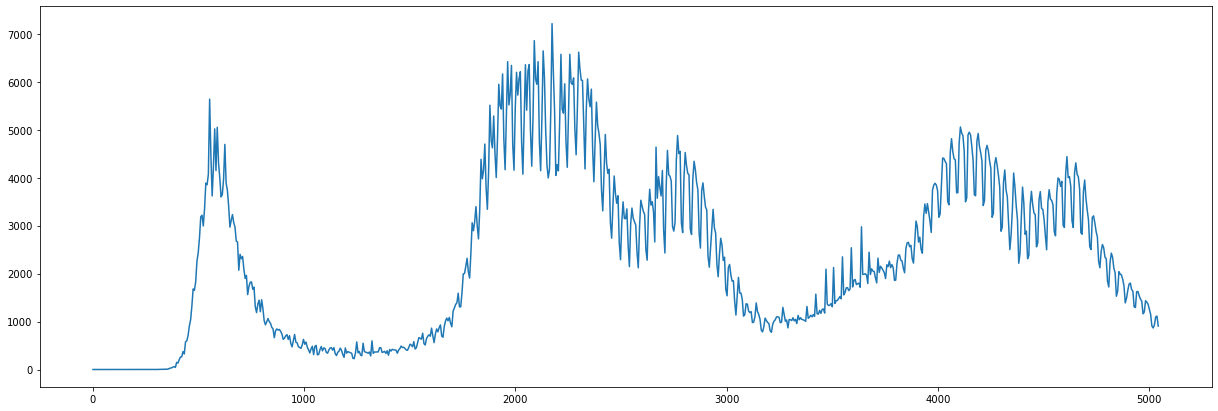

In [30]:
df1.query("Continent=='Europe'")["Deaths"].plot(figsize=(21,7))

In [39]:
# pobieranie danych tylko dla PL i DE
df2 = df_covid.query("Country_code=='PL' or Country_code=='DE'")
df2["Date_repoted"] = pd.to_datetime(df2.Date_reported)
df2.set_index("Date_reported", inplace=True)
df2

<ipython-input-39-ade8d566c33a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["Date_repoted"] = pd.to_datetime(df2.Date_reported)


,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,Date_repoted
Date_reported,,,,,,,,
2020-01-03,DE,Germany,EURO,0,0,0,0,2020-01-03
2020-01-04,DE,Germany,EURO,1,1,0,0,2020-01-04
2020-01-05,DE,Germany,EURO,0,1,0,0,2020-01-05
2020-01-06,DE,Germany,EURO,0,1,0,0,2020-01-06
2020-01-07,DE,Germany,EURO,0,1,0,0,2020-01-07
...,...,...,...,...,...,...,...,...
2022-04-18,PL,Poland,EURO,266,5985517,0,115838,2022-04-18
2022-04-19,PL,Poland,EURO,301,5985818,0,115838,2022-04-19
2022-04-20,PL,Poland,EURO,1523,5987341,31,115869,2022-04-20


In [45]:
df2.index

Index(['2020-01-03', '2020-01-04', '2020-01-05', '2020-01-06', '2020-01-07',
       '2020-01-08', '2020-01-09', '2020-01-10', '2020-01-11', '2020-01-12',
       ...
       '2022-04-13', '2022-04-14', '2022-04-15', '2022-04-16', '2022-04-17',
       '2022-04-18', '2022-04-19', '2022-04-20', '2022-04-21', '2022-04-22'],
      dtype='object', name='Date_reported', length=1682)

In [47]:
covid_PL = df2.query("Country_code=='PL'").New_cases.resample("14D").mean().plot()
covid_PL

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Index'

In [42]:
covid_DE = df2.query(" Country_code=='PL'").New_cases.resample("14D").mean().plot()
covid_DE

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Index'

In [46]:
df_14D = pd.concat([covid_PL, covid_DE], axis=1)
df_14D.columns = ['Polska', 'Niemcy']
df_14D.plot(figsize=(21,6), grid=True, kind='bar')

NameError: name 'covid_PL' is not defined